# **Plant Village Data Analysis**

Loading train/test loader in order to perform analysis on normalized and augumented data <br>with necessary modules for its visualisation

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from preprocessing import train_loader, validation_loader , test_loader, train_dataset, test_dataset

                                 Analitics of normalized and augumented data                                                      

Getting labels for our train and test datasets

In [113]:

train_labels = train_dataset.targets
train_counts = [train_labels.count(i) for i in range(max(train_labels)+1)]

test_labels = test_dataset.targets
test_counts = [test_labels.count(i) for i in range(max(test_labels)+1)]

Collecting 1000 samples from training/validation/test loaders

In [85]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

In [23]:
val_batch_images = []
val_batch_labels = []

count = 0
for images, labels in validation_loader:
    val_batch_images.append(images)
    val_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

y_val = torch.cat(val_batch_labels)[:1000]
X_val = torch.cat(val_batch_images)[:1000]

In [24]:
test_batch_images = []
test_batch_labels = []

count = 0
for images, labels in test_loader:
    test_batch_images.append(images)
    test_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_test = torch.cat(test_batch_images)[:1000]
y_test = torch.cat(test_batch_labels)[:1000]

                       Plotting few examples from data loader                                                    

Creating dictionary with label_name and appropriate quantity

In [116]:
train_labels_names = train_loader.dataset.classes
test_label_names = test_dataset.classes

train_label_dict = {x : y for x,y in zip(train_labels_names,train_counts)}
test_label_dict = {x : y for x,y in zip(test_label_names,test_counts)}

Apply denormalization to show pictures correctly

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9372548861503601].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.827450984120369].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9490195772647858].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9450980317592621].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.7686274466514587].


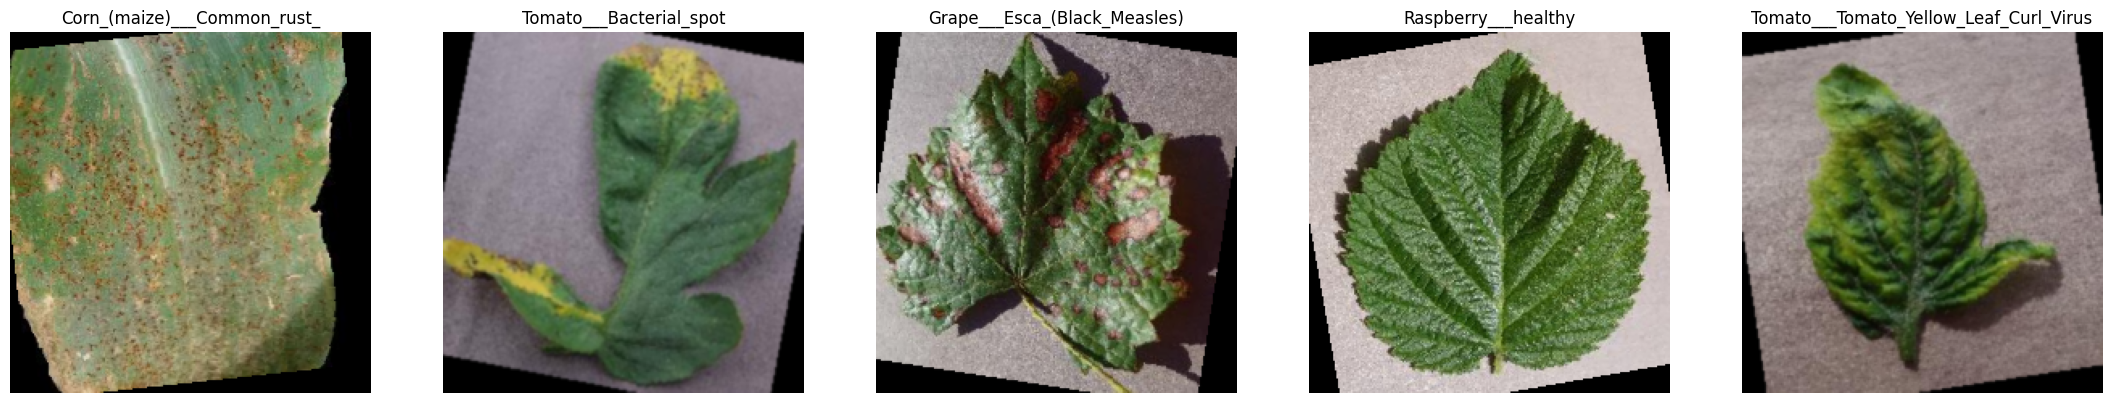

In [117]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.figure(figsize=(27,12))
for i in range(5) :
  plt.subplot(1,5,i+1)
  img = X_sample[i].permute(1, 2, 0).numpy()
  img = (std * (img) + mean) 

  plt.axis("off")
  plt.title(f"{train_labels_names[y_sample[i].item()]}")
  plt.imshow(img)
plt.show()

Pixel intensity distribution (after loading it from train_loader) for 1000 samples

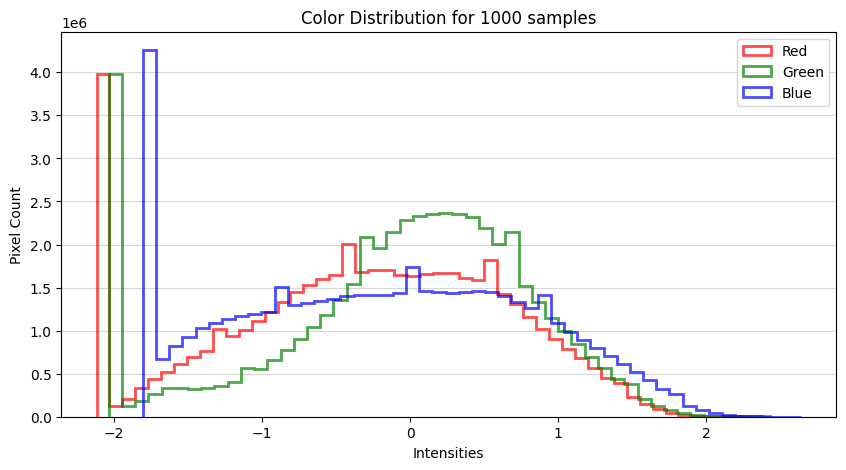

In [93]:
plt.figure(figsize=(10, 5))
plt.hist(red_image, bins=50, color='red', alpha=0.7, histtype='step', label='Red', linewidth=2)
plt.hist(green_image, bins=50, color='green', histtype='step', alpha=0.7, label='Green', linewidth=2)
plt.hist(blue_image, bins=50, color='blue', histtype='step', alpha=0.7, label='Blue', linewidth=2)
plt.title("Color Distribution for 1000 samples")
plt.ylabel("Pixel Count")
plt.xlabel("Intensities")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

                      Creating tabular represenation of our data                                

In [94]:
X_train = pd.DataFrame(X_sample.reshape(1000,-1))
y_train = pd.DataFrame(y_sample, columns=["Labels"])
y_validation = pd.DataFrame(y_val, columns=["Labels"])
y_test_l = pd.DataFrame(y_test, columns=["Lables"])

In [96]:
train_pd_labels = pd.DataFrame(train_labels,columns=["Labels"])

Plots of distributions of labels

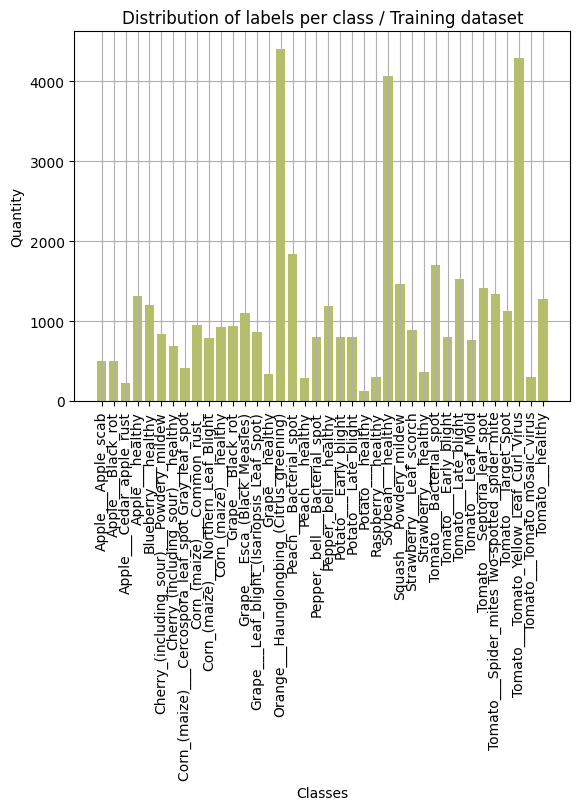

In [119]:
plt.bar(train_label_dict.keys(),train_label_dict.values(), color="#b5bf69")
plt.xticks(rotation=90)
plt.grid()
plt.ylabel("Quantity")
plt.xlabel("Classes")
plt.title("Distribution of labels per class / Training dataset")
plt.show()

**Extreme Imbalance** (The "Long Tail"): The dataset is highly uneven. You have a few "giant" classes with over 4,000 images and many "tiny" classes with fewer than 500 images. The ratio between the largest and smallest class is roughly 30:1.

Dominant Classes (The Majority): The model will see these the most often, making it very good at recognizing them:

  >Soybean Healthy: ~5,000 images

  >Tomato Yellow Leaf Curl Virus: ~5,300 images

  >Orange Haunglongbing: ~5,500 images

Minority Classes (The Minority): The model will struggle to learn these because it rarely sees them:

  >Potato Healthy: ~150 images

  >Apple Black Rot: ~600 images

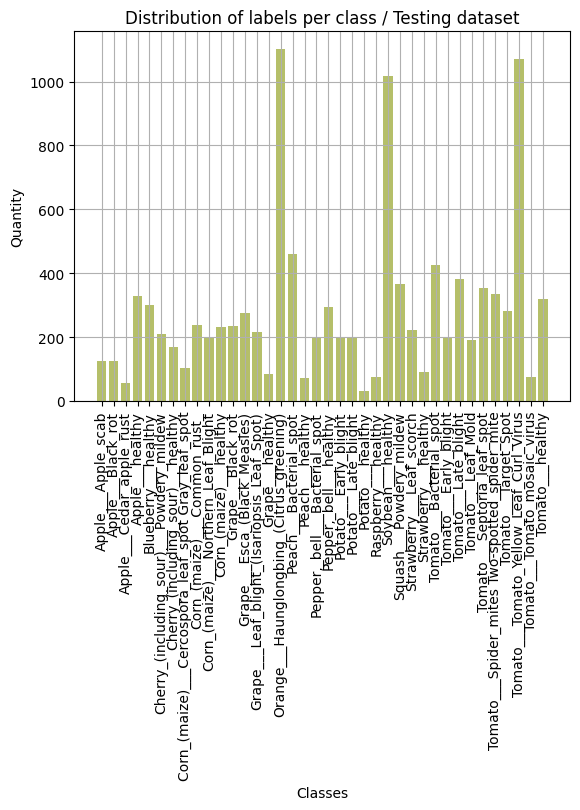

In [120]:
plt.bar(test_label_dict.keys(),test_label_dict.values(), color="#b5bf69")
plt.xticks(rotation=90)
plt.grid()
plt.ylabel("Quantity")
plt.xlabel("Classes")
plt.title("Distribution of labels per class / Testing dataset")
plt.show()

The same problems we can spot in test dataset, so it means our model will generalize well only on specific classes, while for other, we will have troubles.

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 150528 entries, 0 to 150527
dtypes: float32(150528)
memory usage: 574.2 MB


As it is written above , we have 1000 rows, and 150528 columns(this correspond to the width and heigh of each image)

Statistical overview on the numerical data

In [ ]:
X_train.describe()

In [28]:
X_train.isnull().sum().sum()

0

>There are no null values for each column in our DataFrame